In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize

In [2]:
import sys
sys.path.append('..')

In [3]:
from utils.sdafe.ch05.mle import mle_se
from utils.sdafe.ch05.univariate import dsstd

#### Exercise 1

In [4]:
data = pd.read_csv('../data/CRSPday.csv', usecols=range(1, 8), parse_dates=[[0, 1, 2]]).set_index('year_month_day')
data.head()

,ge,ibm,mobil,crsp
year_month_day,,,,
1989-01-03,-0.016760,0.000000,-0.002747,-0.007619
1989-01-04,0.017045,0.005128,0.005510,0.013016
1989-01-05,-0.002793,-0.002041,0.005479,0.002815
1989-01-06,0.000000,-0.006135,0.002725,0.003064
1989-01-09,0.000000,0.004115,0.005435,0.001633


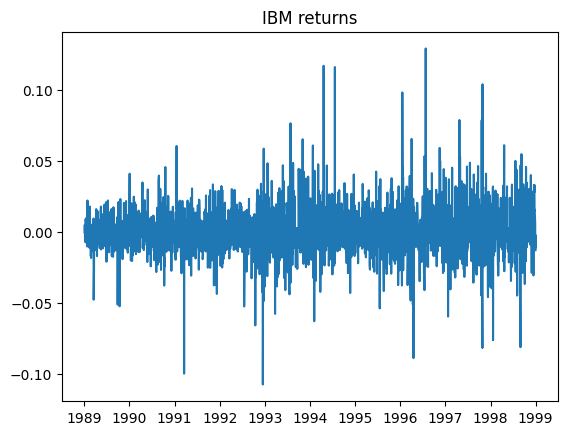

In [5]:
fig, ax = plt.subplots()
ax.plot(data['ibm'])
ax.set_title('IBM returns');

In [6]:
data[['ge', 'ibm', 'mobil']].mean()

ge       0.001071
ibm      0.000700
mobil    0.000779
dtype: float64

In [7]:
data[['ge', 'ibm', 'mobil']].cov()

,ge,ibm,mobil
ge,0.000188,0.000080,0.000053
ibm,0.000080,0.000306,0.000036
mobil,0.000053,0.000036,0.000167


In [8]:
data[['ge', 'ibm', 'mobil']].corr()

,ge,ibm,mobil
ge,1.000000,0.333598,0.297250
ibm,0.333598,1.000000,0.158707
mobil,0.297250,0.158707,1.000000


(a)

In [9]:
data[['mobil']].mean()[0]

0.0007788801424050634

(b)

In [10]:
data['ge'].var()

0.00018821636460058692

(c)

In [11]:
data[['ge', 'mobil']].cov().loc['ge', 'mobil']

5.2703937456344716e-05

(d)

In [12]:
data[['ge', 'mobil']].corr().loc['ge', 'mobil']

0.2972498816049956

#### Exercise 2

$$L(\sigma) = \prod_{i=1}^n f(Y_i | \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac12 \left( \frac{Y_i - \mu}{\sigma} \right)^2} = \frac{\sigma^{-n}}{(2\pi)^{n/2}} \exp{\left( -\frac{1}{2\sigma^2} \sum_{i=1}^n (Y_i - \mu)^2 \right)}$$

$$\log L(\sigma) = -n \log \sigma - \frac{n}{2} \log(2\pi) - \frac{1}{2\sigma^2} \sum_{i=1}^n (Y_i - \mu)^2$$

$$\frac{d}{d\sigma} \log L(\sigma) = -\frac{n}{\sigma} + \frac{1}{\sigma^3} \sum_{i=1}^n (Y_i - \mu)^2$$

Setting $\left . \frac{d}{d\sigma} \log L(\sigma) \right|_{\hat{\sigma}} = 0$, we get $$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (Y_i - \mu)^2.$$

Now, $$\frac{d^2}{d\sigma^2} \log L(\sigma) = \frac{n}{\sigma^2} - \frac{3}{\sigma^4} \sum_{i=1}^n (Y_i - \mu)^2.$$

Then substituting $\sum_{i=1}^n (Y_i - \mu)^2 = n \hat{\sigma}^2$,

$$\left. \frac{d^2}{d\sigma^2} \log L(\sigma) \right|_{\hat{\sigma}} = -\frac{2n}{\hat{\sigma}^2} < 0.$$

So $\log L(\sigma)$ has a maximum at $\hat{\sigma}$.

#### Exercise 3

$$\int_{-\infty}^{+\infty} f^*(y|\xi) = \int_{-\infty}^0 f(y\xi) dy + \int_0^{+\infty} f(y/\xi) dy = \frac{1}{\xi} \int_{-\infty}^0 f(x) dx + \xi \int_0^{+\infty} f(x) dx = \frac{\xi + \xi_{-1}}{2}.$$

#### Problem 4

(a) Given
$$E[X] = \mu,$$
$$E[(X - \mu)^2] = \sigma^2,$$

we have
$$1 + \mathrm{Var}\left[((X - \mu) / \sigma)^2\right] = 1 + \frac{1}{\sigma^4} \left(E[(X - \mu)^4] - E^2[(X - \mu)^2]\right) = 1 + \frac{1}{\sigma^4} \left(E[(X - \mu)^4] - \sigma^4\right) = \frac{E[(X - \mu)^4]}{\sigma^4} = \mathrm{Kurt}[X].$$

(b) Not all random variables have kurtosis. For those that do, using (a) and the fact that variance is always non-negative, we have $\mathrm{Kurt}[X] \geq 1$.

(c) If a random variable $X$ has only two possible values $a \neq b$, such that $P(a)=P(b)=1/2$, then:

$$E[X] = \frac{a+b}{2},$$

$$\mathrm{Var}[X] = E[X^2] - E^2[X] = \frac{a^2 + b^2}{2} - \left(\frac{a+b}{2}\right)^2 = \frac{(a-b)^2}{4},$$

$$\mathrm{Kurt}[X] = \frac{E[(X - \mu)^4]}{\sigma^4} = \frac{ \frac{\left( a - \frac{a + b}{2} \right)^4}{2} + \frac{\left( b - \frac{a + b}{2} \right)^4}{2}  }{\frac{(a - b)^4}{16}} = 1.$$

Now suppose $\mathrm{Kurt}[X] = 1$, and so from (a) we have $$\mathrm{Var}[((X - \mu)/\sigma)^2] = 0,$$ which means that for all values of $X$ $$\left(\frac{X - \mu}{\sigma}\right)^2 = E\left[\left(\frac{X - \mu}{\sigma}\right)^2\right],$$ or equivalently $$(X - \mu)^2 = E[(X - \mu)^2].$$

The right-hand side is a constant, which we can denote by $A = E[(X - \mu)^2]$, so that $$|X - \mu| = \sqrt{A},$$ thus $X$ can only take 2 possible values: $$X = \mu \pm \sqrt{A}.$$

We can denote these values as $a = \mu + \sqrt{A}$ and $b = \mu - \sqrt{A}$. Adding the two equations together we have $$\mu = \frac{a + b}{2},$$ at the same time by definition $$\mu = E[X] = ap + b(1-p),$$ where $p = P(a)$.

We conclude that $P(a) = P(b) = 1/2$.

#### Problem 5

Given $E[X] = \mu$,
$$E[(X - \mu)^2] = E[X^2] - 2\mu E[X] + \mu^2 = E[X^2] - \mu^2.$$
For a normal distribution, $E[(X-\mu)^2] = \sigma^2$, so $$E[X^2] = \sigma^2 + \mu^2.$$

Then
$$E[(X-\mu)^3] = E[X^3] - 2\mu E[X^2] - 2\mu^2E[X] + \mu^3 = E[X^3] - 2\mu \sigma^2 - 3 \mu^3.$$
For a normal distribution $E[(X-\mu)^3] = 0$, so $$E[X^3] = 2\mu \sigma^2 + 3 \mu^3.$$

And
$$E[(X-\mu)^4] = E[X^4] - 3 \mu E[X^3] + 6 \mu^2 E[X^2] - 3 \mu^3 E[X] + \mu^4 = E[X^4] - 5 \mu^4.$$
For a normal distribution, $E[(X-\mu)^4] = 3\sigma^4$, so
$$E[X^4] = 3\sigma^4 + 5 \mu^4.$$

For the mixture, we have
$$\mu = E[X] = \int_{-\infty}^{+\infty} x \sum_{i=1}^n p_i f(x | \mu_i, \sigma_i) dx = \sum_{i=1}^n p_i \int_{-\infty}^{+\infty} x f(x | \mu_i, \sigma_i) dx = \sum_{i=1}^n p_i \mu_i,$$
$$\sigma^2 = E[(X-\mu)^2] = E[X^2] - \mu^2 = \int_{-\infty}^{+\infty} x^2 \sum_{i=1}^n p_i f(x | \mu_i, \sigma_i) dx - \mu^2 = \sum_{i=1}^n p_i \int_{-\infty}^{+\infty} x^2 f(x | \mu_i, \sigma_i) dx - \mu^2 = \sum_{i=1}^n p_i E[X^2|\mu_i,\sigma_i] - \mu^2 = \sum_{i=1}^n p_i (\sigma_i^2 + \mu_i^2) - \mu^2,$$
$$E[(X-\mu)^4] = E[X^4] - 5 \mu^4 = \int_{-\infty}^{+\infty} x^4 \sum_{i=1}^n p_i f(x | \mu_i, \sigma_i) dx - 5 \mu^4 = \sum_{i=1}^n p_i \int_{-\infty}^{+\infty} x^4 f(x | \mu_i, \sigma_i) dx - 5 \mu^4 = \sum_{i=1}^n p_i E[X^4|\mu_i,\sigma_i] - 5 \mu^4 = \sum_{i=1}^n p_i (3 \sigma_i^4 + 5 \mu_i^4) - 5 \mu^4,$$
and ultimately
$$\mathrm{Kurt}[X] = \frac{E[(X-\mu)^4]}{\sigma^4} = \frac{\sum_{i=1}^n p_i (3 \sigma_i^4 + 5 \mu_i^4) - 5 \mu^4}{\left(\sum_{i=1}^n p_i (\sigma_i^2 + \mu_i^2) - \mu^2 \right)^2}.$$

(a)

In [13]:
pi = np.array([0.95, 0.05])
mui = np.array([0, 0])
sigmai = np.sqrt(np.array([1, 10]))

In [14]:
def kurt_mix(pi, mui, sigmai):
    mu = np.sum(pi * mui)
    num = np.sum(pi * (3 * sigmai ** 4 + 5 * mui ** 4)) - 5 * mu ** 4
    den = np.sum(pi * (sigmai ** 2 + mui ** 2) - mu ** 2) ** 2
    return num / den

In [15]:
kurt_mix(pi, mui, sigmai)

8.489892984542214

(c) When $\mu_i = 0$, we have
$$\mathrm{Kurt}[X] = 3 \frac{\sum_{i=1}^n p_i \sigma_i^4}{\left(\sum_{i=1}^n p_i \sigma_i^2\right)^2}.$$

For a mixture of two normal distributions with $p_1 = p$ and $p_2 = (1-p)$, $\sigma_1^2 = 1$ and $\sigma_2^2 = \sigma^2$,
$$\mathrm{Kurt}[X] = 3 \frac{p + (1-p)\sigma^4}{(p + (1-p)\sigma^2)^2}.$$
When $(1-p)\sigma^2 \gg p$,
$$\mathrm{Kurt}[X] = 3 \frac{(1-p)\sigma^4}{(1-p)^2\sigma^4} = \frac{3}{1-p},$$
so it can be made arbitrarily large when $p \to 1$.

To achieve kurtosis over 10000, set $p > 1 - \frac{3}{100000} = 0.9997$ and $\sigma^2 > \frac{1}{0.0003} \approx 3333.3$.

In [16]:
kurt_mix(np.array([0.9999, 0.0001]), np.array([0, 0]), np.array([1, np.sqrt(15000)]))

10801.34404224123

(d)
$$\mathrm{Kurt}[X] = 3 \frac{p + (1-p)\sigma^4}{(p + (1-p)\sigma^2)^2} \geq 3 \frac{(1-p)\sigma^4}{(p + (1-p)\sigma^2)^2} = \frac{3}{1-p} \frac{(1-p)^2\sigma^4}{(p + (1-p)\sigma^2)^2} =
\frac{3}{1-p} \frac{\left(\frac{1-p}{p} \sigma^2\right)^2}{\left(1+\frac{1-p}{p}\sigma^2\right)^2} = \frac{3}{1-p} \frac{a^2}{(1+a)^2} = \frac{3}{1-p} \frac{1}{\left(1+\frac{1}{a}\right)^2},$$
where
$$a = \frac{1-p}{p} \sigma^2.$$

Fixing $a=1$, we have
$$\frac{3}{1-p} \frac{1}{\left(1 + \frac{1}{a}\right)^2} = \frac{3}{4(1-p)}$$

Setting $$\frac{3}{4(1-p)} > M$$ yields $$p > 1 - \frac{3}{4M}.$$

Then taking $$p > \max\left(p_0, 1 - \frac{3}{4M}\right)$$ and $$\sigma^2 = \frac{p}{1-p},$$ we get $\mathrm{Kurt}[X] > M$.

#### Problem 6

In [17]:
data = pd.read_csv('../data/FlowData.csv')
data.head()

,Flow1,Flow2,Flow3
0,1130118,2217628,419489
1,1105125,2217628,391512
2,745276,2217628,227725
3,698220,2217628,230217
4,778948,2217629,192731


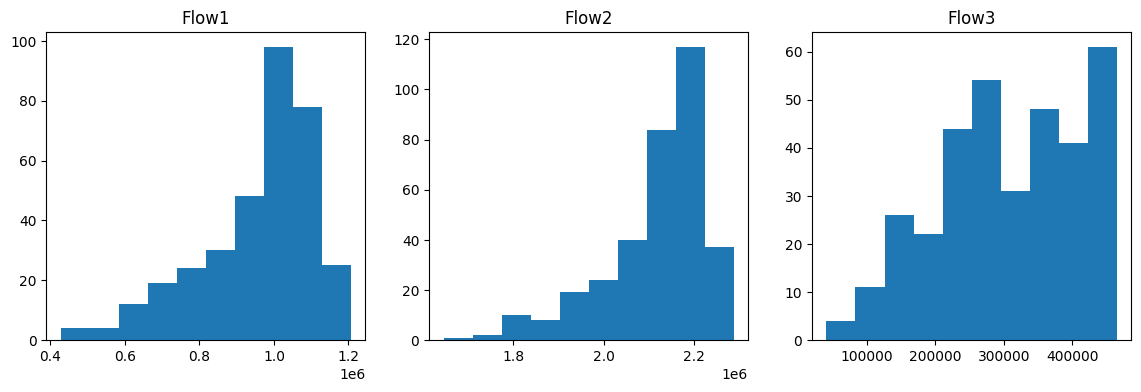

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
for i, col in enumerate(data.columns):
    axs[i].hist(data[col])
    axs[i].set_title(col)

In [19]:
def fit_skt(x):
    loglik_f = lambda beta: np.sum(-np.log(dsstd(x, mean=beta[0], sd=beta[1], nu=beta[2], xi=beta[3])))
    start = np.array([np.mean(x), np.std(x, ddof=1), 4, 1])
    return minimize(loglik_f, start, method='L-BFGS-B', bounds=[(-1, None), (0.001, None), (2.001, None), (0.001, None)])

In [20]:
fit = [fit_skt(data[col]) for col in data.columns]

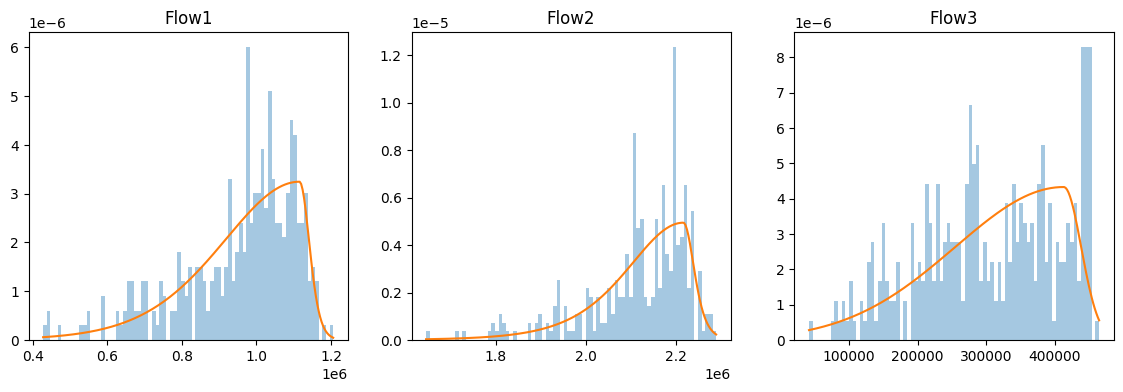

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
for i, col in enumerate(data.columns):
    axs[i].hist(data[col], bins=80, density=True, alpha=0.4)
    axs[i].set_title(col)
    xs = np.linspace(np.min(data[col]), np.max(data[col]), 200)
    axs[i].plot(xs, dsstd(xs, *fit[i].x), label='skewed t-distr.')

#### Problem 7

$$L(\theta) = \prod_{i=1}^n \frac{1}{\theta} e^{-\frac{X_i}{\theta}} = \frac{1}{\theta^n} e^{-\frac{1}{\theta}\sum_{i=1}^n X_i},$$
$$\log L(\theta) = -n \log \theta - \frac{1}{\theta} \sum_{i=1}^n X_i,$$
$$(\log L(\theta))' = -\frac{n}{\theta} + \frac{1}{\theta^2} \sum_{i=1}^n X_i.$$

Setting $(\log L(\theta))' = 0$ gives us
$$\hat{\theta} = \frac{1}{n} \sum_{i=1}^n X_i.$$
Then $$(\log L(\theta))'' = \frac{n}{\theta^2} - \frac{2}{\theta^3} \sum_{i=1}^n X_i.$$
Substituting $$\sum_{i=1}^n X_i = n \hat{\theta},$$
we have $$\left.(\log L(\theta))''\right|_{\hat{\theta}} = -\frac{n}{\hat{\theta}^2} < 0,$$
so $L(\theta)$ has a maximum at $\hat{\theta}$.

#### Problem 8

$$\mathrm{Bias}[\hat{\theta}] = E[\hat{\theta}] - \theta,$$
therefore
$$\mathrm{Bias}^2[\hat{\theta}] = E^2[\hat{\theta}] - 2 \theta E[\hat{\theta}] + \theta^2,$$
whereas
$$\mathrm{Var}[\hat{\theta}] = E[\hat{\theta}^2] - E^2[\hat{\theta}],$$
so
$$\mathrm{Bias}^2[\hat{\theta}] + \mathrm{Var}[\hat{\theta}] = E[\hat{\theta}^2] - 2 \theta E[\hat{\theta}] + \theta^2 = E[\hat{\theta}^2 - 2 \theta E[\hat{\theta}] + \theta^2] = E[(\hat{\theta} - \theta)^2] = \mathrm{MSE}[\hat{\theta}].$$

#### Problem 9

If $X_1, ..., X_n \sim N(\mu, \sigma^2)$ and $\hat{\mu} = \frac{1}{n} \sum_{i=1}^n X_i$, then
$$E[\hat{\mu}] = E\left[ \frac{1}{n} \sum_{i=1}^n X_i \right] = \frac{1}{n} \sum_{i=1}^n E[X_i] = \frac{1}{n} \sum_{i=1}^n \mu = \mu$$
and so
$$\mathrm{Bias}[\hat{\mu}] = E[\hat{\mu}] - \mu = 0.$$

Given $X_1, ..., X_n$ are i.i.d., $$\mathrm{Cov}[X_i, X_j] = \begin{cases}
                        0 &\text{if } i \neq j \\
                        \sigma^2 &\text{if } i = j
                    \end{cases}$$

Also
$$\mathrm{Cov}[X_i, X_j] = E[X_i X_j] - E[X_i] E[X_j],$$
so
$$E[X_i X_j] = E[X_i] E[X_j] + \mathrm{Cov}[X_i, X_j] =
\begin{cases}
    \mu^2 &\text{if } i \neq j \\
    \mu^2 + \sigma^2 &\text{if } i = j
\end{cases}
$$

Then 
$$E[\hat{\mu}^2] = E\left[ \left( \frac{1}{n} \sum_{i=1}^n X_i \right)^2 \right] = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n E[X_i X_j] = \frac{1}{n^2} \left(n^2 \mu^2 + n \sigma^2\right) = \mu^2 + \frac{\sigma^2}{n}$$
and
$$\mathrm{Var}[\hat{\mu}] = E[\hat{\mu}^2] - E^2[\hat{\mu}] = \mu ^2 + \frac{\sigma^2}{n} - \mu^2 = \frac{\sigma^2}{n}.$$

Finally,
$$\mathrm{MSE}[\hat{\mu}] = \mathrm{Bias}^2[\hat{\mu}] + \mathrm{Var}[\hat{\mu}] = \frac{\sigma^2}{n}.$$

The derivation above does not rely on the normality of the distribution, so holds for other types of distributions as well.

#### Problem 10

The kurtosis of the t-distribution is given by $$\mathrm{Kurt}[X] = 3 + \frac{6}{\nu - 4},$$ therefore if the sample kurtosis is 9, the estimate of $\nu$ is $$\nu = 4 + \frac{6}{\mathrm{Kurt}[X] - 3} = 5.$$

#### Problem 11

(a) The empirical distribution is approximated by the Poisson distribution with the parameter $\lambda$ dependent on the economic variable $x$: $\lambda = \theta_1 + \theta_2 x$.

(b) The estimates are:

In [22]:
theta = np.array([1.0773, 0.4529])

(c)

In [23]:
se = np.array([0.08742, 0.03912])

In [24]:
conf = 0.95

In [25]:
q = stats.norm.ppf(1 - (1 - conf) / 2)

The confidence intervals are:

In [26]:
theta.reshape(-1, 1) + se.reshape(-1, 1) * np.array([-1, 1]) * q

array([[0.90595995, 1.24864005],
       [0.37622621, 0.52957379]])

#### Problem 12

In [27]:
data = pd.read_csv('../data/bmw.csv', usecols=[1, 2], index_col=0, parse_dates=[0])
data.head()

,bmw
date,
1973-01-02,0.047704
1973-01-03,0.007127
1973-01-04,0.008883
1973-01-05,-0.012441
1973-01-08,-0.003570


In [28]:
def fit_t(x):
    loglik_f = lambda beta: np.sum(-np.log(stats.t.pdf(x, loc=beta[0], scale=beta[1], df=beta[2])))
    start = np.array([np.mean(x), np.std(x, ddof=1), 2])
    return minimize(loglik_f, start, method='L-BFGS-B', bounds=[(-1, None), (0.001, None), (1, None)]), loglik_f

In [29]:
fit, loglik_f = fit_t(data['bmw'])
fit

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -17863.281191359587
        x: [ 1.323e-04  9.265e-03  2.988e+00]
      nit: 9
      jac: [ 4.053e-01 -7.683e-01  1.455e-03]
     nfev: 48
     njev: 12
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

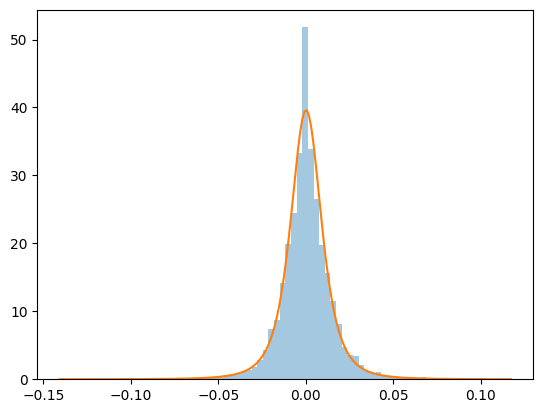

In [30]:
xs = np.linspace(np.min(data['bmw']), np.max(data['bmw']), 200)

fig, ax = plt.subplots()
ax.hist(data['bmw'], bins=80, density=True, alpha=0.4);
ax.plot(xs, stats.t.pdf(xs, loc=fit.x[0], scale=fit.x[1], df=fit.x[2]), label='symmetric t-distribution');

In [31]:
se = mle_se(fit.x, loglik_f, 1e-6)
se

array([0.00014414, 0.00016496, 0.13659599])

(d) The estimate of $\nu$ is

In [32]:
fit.x[2]

2.9875345543544296

The standard error of the estimate is

In [33]:
se[2]

0.13659599177965118

#### Problem 13

In [34]:
data = pd.read_csv('../data/siemens.csv', index_col=0)
data.head()

,x
1,0.014347
2,0.010862
3,0.007021
4,0.001864
5,0.000000


In [35]:
def plot_qq(ret, name, dfs):
    qs = np.array([0.25, 0.75])
    
    rows = math.ceil(len(dfs) / 2)
    fig, axs = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    fig.suptitle(name)
    for i, df in enumerate(dfs):
        ax = axs[i // 2][i % 2]
        stats.probplot(ret, dist="t", sparams=df, plot=ax, fit=False)
        
        # draw a regression line through 0.25 and 0.75 quantiles
        coord = lambda q: (stats.t.ppf(q, df), np.quantile(ret, q))
        ax.axline(coord(qs[0]), coord(qs[1]), color='red')
        
        ax.set_title(f'df = {df}')
        ax.set_xlabel('')
    plt.show()

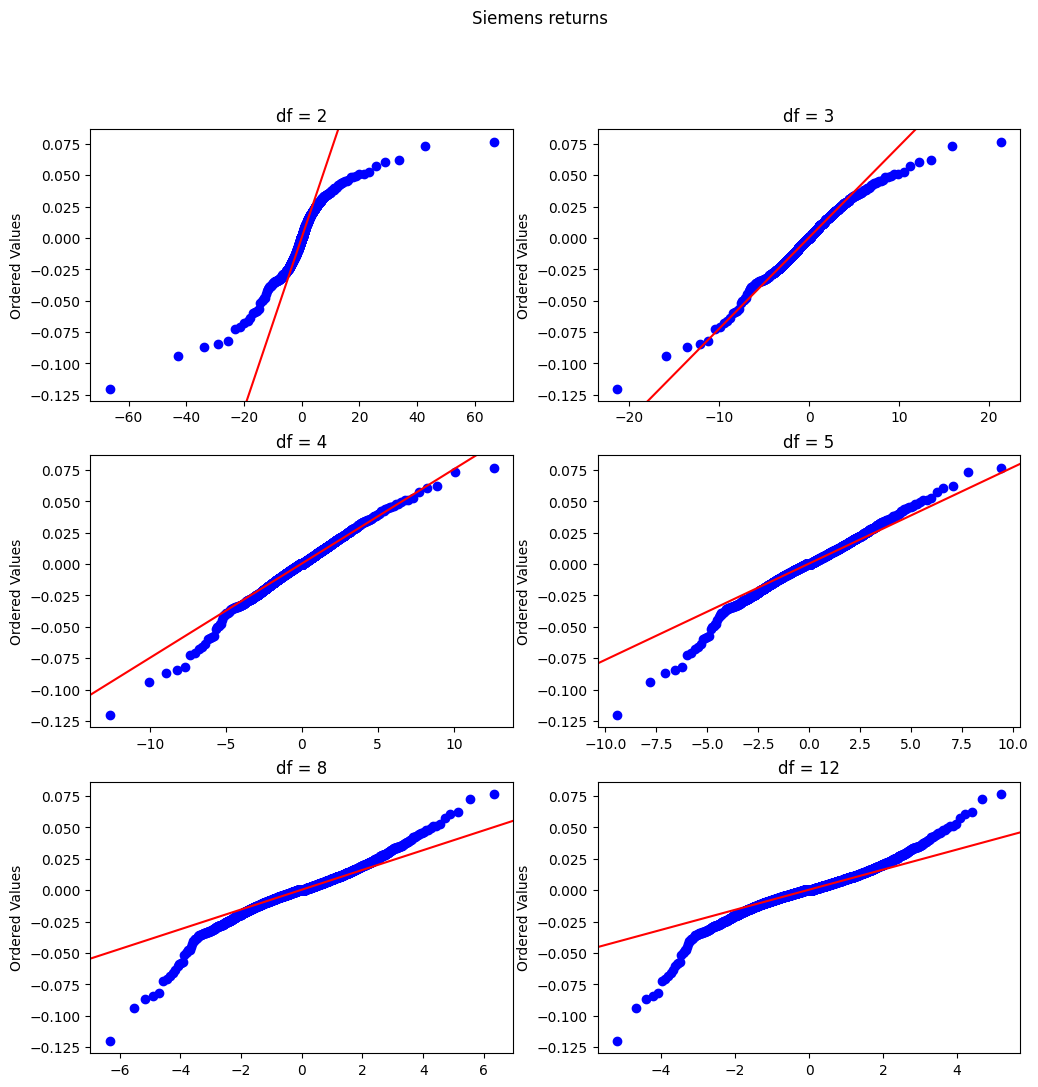

In [36]:
plot_qq(data['x'], 'Siemens returns', [2, 3, 4, 5, 8, 12])

(a) The returns have lighter tails than the t-distribution with 2 degrees of freedom.

(b) A t-distribution with 4 degrees of freedom provides the best fit.

(c)

In [37]:
fit, loglik_f = fit_t(data['x'])
fit

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -19365.93948241547
        x: [ 2.917e-04  7.539e-03  3.333e+00]
      nit: 26
      jac: [ 2.019e-01 -8.858e-01  1.091e-03]
     nfev: 124
     njev: 31
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

The MLE of $\nu$ is:

In [38]:
fit.x[2]

3.3328782637561813

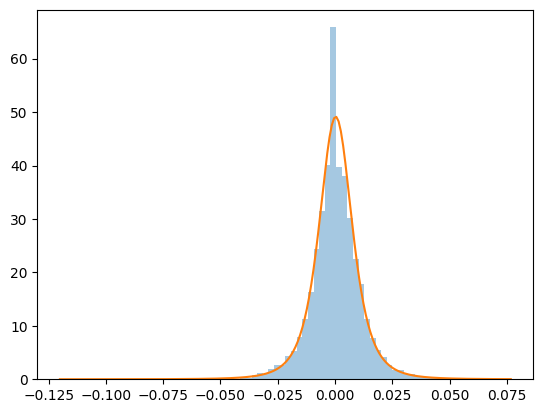

In [39]:
xs = np.linspace(np.min(data['x']), np.max(data['x']), 200)

fig, ax = plt.subplots()
ax.hist(data['x'], bins=80, density=True, alpha=0.4)
ax.plot(xs, stats.t.pdf(xs, loc=fit.x[0], scale=fit.x[1], df=fit.x[2]), label='symmetric t-distribution');